In [62]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [63]:
#onecall = True  # 8 days
onecall = False # 5 days

In [64]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [65]:
onecall = False

In [66]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [67]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1735203600, 'main': {'temp': 5.31, 'feels_like': 4.07, 'temp_min': 5.31, 'temp_max': 7.33, 'pressure': 1035, 'sea_level': 1035, 'grnd_level': 1025, 'humidity': 98, 'temp_kf': -2.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 75}, 'wind': {'speed': 1.69, 'deg': 64, 'gust': 6.24}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-12-26 09:00:00'}, {'dt': 1735214400, 'main': {'temp': 6.88, 'feels_like': 5.07, 'temp_min': 6.88, 'temp_max': 10.01, 'pressure': 1035, 'sea_level': 1035, 'grnd_level': 1024, 'humidity': 88, 'temp_kf': -3.13}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 51}, 'wind': {'speed': 2.57, 'deg': 59, 'gust': 5.59}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-12-26 12:00:00'}, {'dt': 1735225200, 'main': {'temp': 8.71, 'feels_

In [68]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1735203600
main          {'temp': 5.31, 'feels_like': 4.07, 'temp_min':...
weather       [{'id': 803, 'main': 'Clouds', 'description': ...
clouds                                              {'all': 75}
wind                   {'speed': 1.69, 'deg': 64, 'gust': 6.24}
visibility                                                10000
pop                                                           0
sys                                                {'pod': 'd'}
dt_txt                                      2024-12-26 09:00:00
Name: 0, dtype: object


In [69]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt'],
      dtype='object')

In [70]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   26/12 10:00  10:00      7.33      5.31
1   26/12 13:00  13:00     10.01      6.88
2   26/12 16:00  16:00     10.41      8.71
3   26/12 19:00  19:00      8.59      8.59
4   26/12 22:00  22:00      7.30      7.30
5   27/12 01:00  01:00      6.17      6.17
6   27/12 04:00  04:00      5.31      5.31
7   27/12 07:00  07:00      4.62      4.62
8   27/12 10:00  10:00      4.66      4.66
9   27/12 13:00  13:00      7.17      7.17
10  27/12 16:00  16:00      7.84      7.84
11  27/12 19:00  19:00      6.17      6.17
12  27/12 22:00  22:00      5.21      5.21
13  28/12 01:00  01:00      4.48      4.48
14  28/12 04:00  04:00      3.97      3.97
15  28/12 07:00  07:00      3.55      3.55
16  28/12 10:00  10:00      3.71      3.71
17  28/12 13:00  13:00      6.34      6.34
18  28/12 16:00  16:00      7.10      7.10
19  28/12 19:00  19:00      5.73      5.73
20  28/12 22:00  22:00      4.99      4.99
21  29/12 01:00  01:00      4.41      4.41
22  29/12 0

In [71]:
_5days['human_date']

0     26/12 10:00
1     26/12 13:00
2     26/12 16:00
3     26/12 19:00
4     26/12 22:00
5     27/12 01:00
6     27/12 04:00
7     27/12 07:00
8     27/12 10:00
9     27/12 13:00
10    27/12 16:00
11    27/12 19:00
12    27/12 22:00
13    28/12 01:00
14    28/12 04:00
15    28/12 07:00
16    28/12 10:00
17    28/12 13:00
18    28/12 16:00
19    28/12 19:00
20    28/12 22:00
21    29/12 01:00
22    29/12 04:00
23    29/12 07:00
24    29/12 10:00
25    29/12 13:00
26    29/12 16:00
27    29/12 19:00
28    29/12 22:00
29    30/12 01:00
30    30/12 04:00
31    30/12 07:00
32    30/12 10:00
33    30/12 13:00
34    30/12 16:00
35    30/12 19:00
36    30/12 22:00
37    31/12 01:00
38    31/12 04:00
39    31/12 07:00
Name: human_date, dtype: object

In [72]:
xticks= list(_5days['time'])
xticks

['10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00']

In [73]:
# plot
start = _5days['time'][0]
start

'10:00'

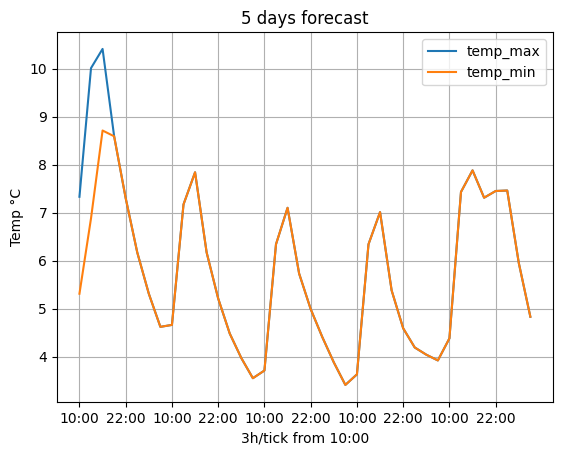

In [74]:
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel(f'3h/tick from {start}')
plt.xticks(ticks=np.arange(0,40,4), labels=xticks[::4])
plt.grid()
plt.show()
    

In [75]:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
# locs, labels = plt.xticks()

In [76]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

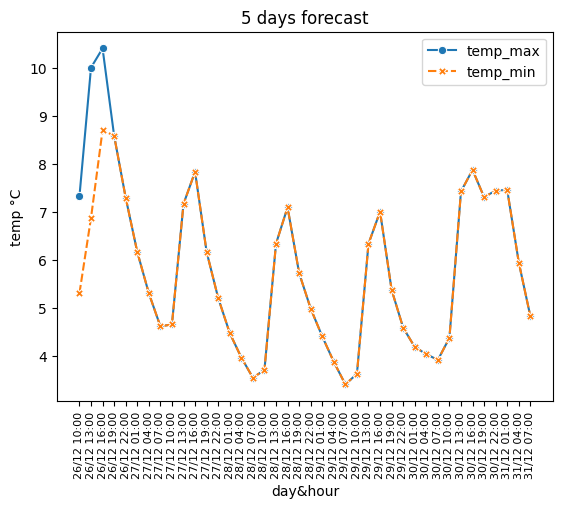

In [77]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 

# set index to be used as labels for x-axis
df1 = df1.set_index('human_date')
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

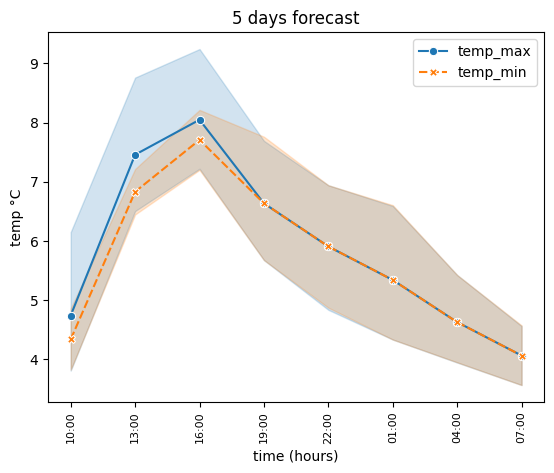

In [78]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 

In [79]:
df2

,temp_max,temp_min
time,,
10:00,7.33,5.31
13:00,10.01,6.88
16:00,10.41,8.71
19:00,8.59,8.59
22:00,7.30,7.30
01:00,6.17,6.17
04:00,5.31,5.31
07:00,4.62,4.62
10:00,4.66,4.66


In [80]:
df2_grp = df2.groupby('time')

In [81]:
for k in df2_grp:
    print(k[1]['temp_max'], type(k[1]))
    

time
01:00    6.17
01:00    4.48
01:00    4.41
01:00    4.19
01:00    7.46
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
04:00    5.31
04:00    3.97
04:00    3.88
04:00    4.04
04:00    5.95
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
07:00    4.62
07:00    3.55
07:00    3.41
07:00    3.92
07:00    4.83
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
10:00    7.33
10:00    4.66
10:00    3.71
10:00    3.63
10:00    4.38
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
13:00    10.01
13:00     7.17
13:00     6.34
13:00     6.34
13:00     7.43
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
16:00    10.41
16:00     7.84
16:00     7.10
16:00     7.01
16:00     7.88
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
19:00    8.59
19:00    6.17
19:00    5.73
19:00    5.38
19:00    7.31
Name: temp_max, dtype: float64 <class 'pandas.core.

time
01:00    Axes(0.125,0.11;0.775x0.77)
04:00    Axes(0.125,0.11;0.775x0.77)
07:00    Axes(0.125,0.11;0.775x0.77)
10:00    Axes(0.125,0.11;0.775x0.77)
13:00    Axes(0.125,0.11;0.775x0.77)
16:00    Axes(0.125,0.11;0.775x0.77)
19:00    Axes(0.125,0.11;0.775x0.77)
22:00    Axes(0.125,0.11;0.775x0.77)
dtype: object

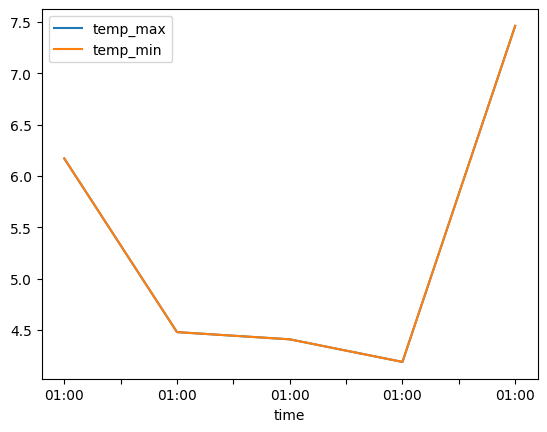

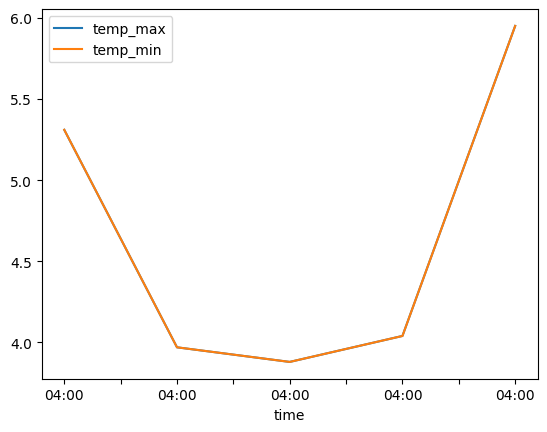

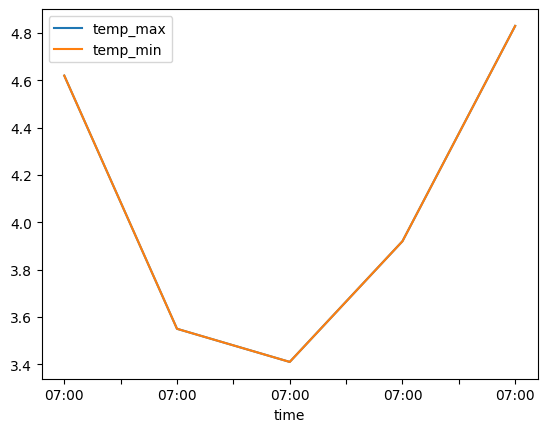

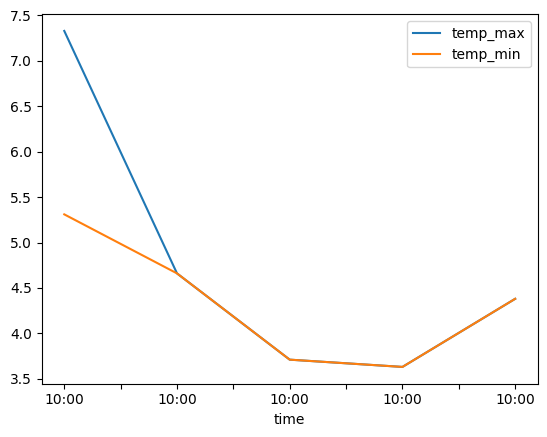

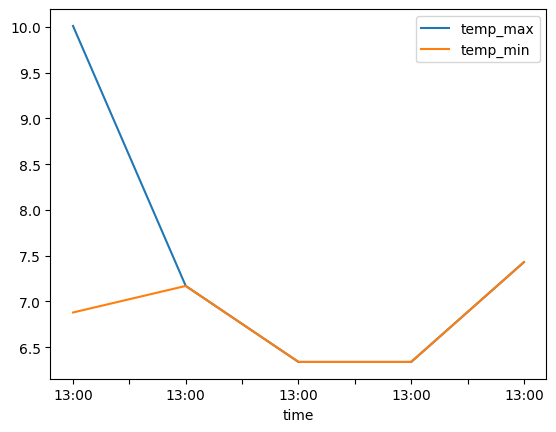

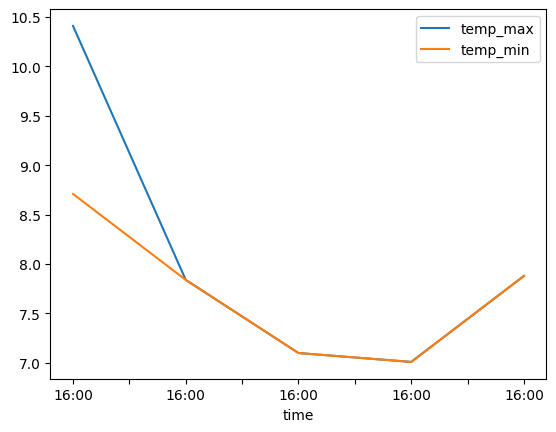

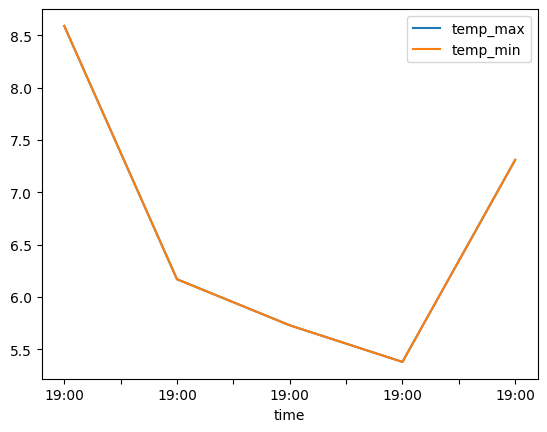

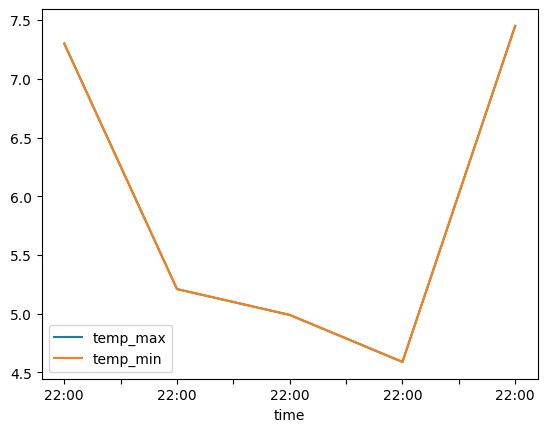

In [82]:
df2_grp.plot()